# Реализация (просто) бинарного дерева


### Бинарное дерево

__Бинарное дерево__ - это иерархическая структура данных, в которой каждый узел имеет значение (оно же является в данном случае и ключом) и ссылки на левого и правого потомка. 

![Tree Structure](https://koenig-media.raywenderlich.com/uploads/2016/07/BinaryTree.png)

Узел (___node___), находящийся на самом верхнем уровне (не являющийся чьим либо потомком) называется корнем (___root___). Узлы, не имеющие потомков (оба потомка которых равны NULL) называются листьями (___leaf___).


### Класс вершины дерева

Простейшая вершина бинарного дерева должна обладать следующими свойствами:

1. В вершине хранится информация об объекте, который эта вершина содержит
2. В вершине хранится информация об ее потомках (левом и правом).

|<img src="https://koenig-media.raywenderlich.com/uploads/2016/08/BinaryTree-2.png" width="300"> |  <img src="https://koenig-media.raywenderlich.com/uploads/2016/08/BinaryTree-2-1.png" width="300"> |
|:---:|:---:|
| Левый потомок | Правый потомок|


#### Реализуем класс вершины дерева

In [1]:
class TreeNode(object):
    """
    Tree node: left and right child + id -- number of the node
    """
    def __init__(self, id_):
        self.id = id_
        self.left = None
        self.right = None

Само дерево определяется своим корнем - `root`, который хранит указатели на поддеревья.

#### Реализуем класс дерева

In [2]:
import numpy as np

class BinaryTree:
    
    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return int(self.size)
    
    def insert(self, subtree, new_value):
        if subtree is None:
            return TreeNode(new_value)
        if np.random.choice(['left', 'right']) == 'left':
            subtree.left = self.insert(subtree.left, new_value)
        else:
            subtree.right = self.insert(subtree.right, new_value)
        return subtree

    def build_tree(self, n):
        for i in range(n):
            self.root = self.insert(self.root, i + 1)
            

Построим какое-нибудь простое дерево:

In [3]:
from visualizer import draw_tree
%matplotlib inline

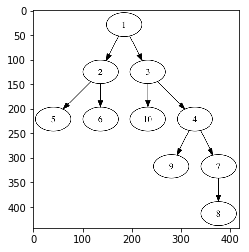

In [4]:
tree = BinaryTree()
tree.build_tree(10)

draw_tree(tree.root, file_name='tree')

In [5]:
tree.root.right.right.id

4

## Обходы деревьев (DFS vs. BFS)

![](https://hamzic.files.wordpress.com/2016/12/fig1.gif?w=630)

### Обход дерева в ширину

Все достаточно просто — мы бегаем в начале по вершине-родителю, потом по всем ее потомкам, потом по всем потомкам потомков, и так далее.

Алгоритм BFS:
1. Поместить корневую вершину в изначально пустую очередь.
2. Извлечь из начала очереди вершина $u$.
3. В конец очереди добавляются левый и правый потомки вершины $u$, которые ещё не были посещены и отмечаются, как посещенные.
4. Если очередь пуста, то все вершины дерева были просмотрены; завершить обход.
5. Вернуться к п. 2.

<img src="http://www.pvsm.ru/images/obhod-binarnyh-derevev-rekursiya-iteracii-i-ukazatel-na-roditelya.jpg" width="450"> 

In [6]:
def TreeBFS(tree):
    visited = set()
    queue = []
    
    queue.append(tree.root)
    visited.add(tree.root)
    
    print ("BFS order:", end=' ')
    while queue:
        
        u = #get top element from the queue
        print (current.id, end=' -> ')
        
        # add left child if it is not None and hasn't been visited to the queue and visited
        
        # add right child if it is not None and hasn't been visited to the queue and visited
            
    print('end')

In [7]:
TreeBFS(tree)

BFS order: 1 -> 2 -> 3 -> 5 -> 6 -> 10 -> 4 -> 9 -> 7 -> 8 -> end



### Обход дерева в глубину

Алгоритмы в глубь имеют три типа обходов:
1. __Pre-order:__ Pre-order стоит использовать именно тогда, когда вы знаете что вам нужно проверить родителей перед тем как проверять их потомков.
2. __In-order:__ In-order обход используется как раз когда нам надо проверять в начале потомков и только потом подниматься к родительским узлам.
3. __Post-order:__ Post-order самый забавный случай — это случай когда нам нужно начать с листьев и завершить главным узлом — то есть разложить дерево на то, как оно строилось.

<img src="http://habrastorage.org/files/654/015/a63/654015a637ab473cbbe11a1adcc993c5.png" width="500"> 


In [8]:
def TreeDFS(tree, visited=None):
    if visited is None: # the first iteration
        visited = set()
        print ("DFS order:", end=' ')
        
    visited.add(tree)
    print (tree.id, end=' -> ')
    
    # call DFS(left child) if it is not None and hasn't been visited to the queue and visited
        
    # call DFS(right child) if it is not None and hasn't been visited to the queue and visited

In [9]:
TreeDFS(tree.root)

DFS order: 1 -> 2 -> 5 -> 6 -> 3 -> 10 -> 4 -> 9 -> 7 -> 8 -> 